# CS 449 Final Project Update

Due: May 23, 2023 at 11:59pm

## 1. Names and Net IDs

> Shreya Sridhar, ssc9138

> Siddharth Saha, ssg8158

## 2. Abstract

*Write a new abstract that describes the motivation for your project and proposed methods. This should reflect any changes you've made, but you'll explain those changes later.*

> We will train a conditional and unconditional diffusion model specifically to generate landscape images. We will use a subset of a Kaggle landscape image dataset (linked here) to train our model. We will measure the performance of our model with FID scores and an image classifier. 


# 3. Big Changes

*Describe any major changes that have taken your project in a new direction. What made you decide to make these changes? Were some things easier or harder than you expected?*

> For example: we intended to train sklearn models on the MNIST dataset, but found that was way too easy. We instead decided to use torch models on the more complicated Fashion MNIST dataset. This led us to an interesting challenge where...

> We shifted around our desired and stretch goals. We had initially planned to find optimal values for many different hyperparameters for our diffusion model in our desired goals. However, we have found that it is very computationally expensive to train our model. Running the model the first time exhausted a team member's free trial for the GPU on Colab. We fear that we won't be able to adequately experiment with different values for the hyperparameters before our credits get exhausted. As such, we have shifted this goal to our stretch goals. We are now more focussed on first training our model unconditionally and then conditionally and observing the difference in results. 

## 4a. Describe your dataset(s)

*This should be an updated version of your datasets section from your proposal. Write this section as if the reader hasn't read your original proposal. List the datasets you're using, where you found them, and what they contain. Be detailed! For each dataset, what does the data look like? What is the data representation? (e.g., what resolution of images? what length of sequences?) How is the data annotated or labeled? Include citations for the datasets. Include at least one citation of previous work that has used this data, or an explanation of why it hasn't been used before*

> We will use the Landscape Recognition dataset from Kaggle (Landscape Recognition | Image Dataset | 12k Images | Kaggle). The images are all of different dimensions, so cropping/resizing the images to be of consistent size will be necessary when training. The images are divided into 5 different classes (coast, desert, forest, glacier, mountain), with an equal number of images from each class. 

> The data has also been pre-divided into training, testing, and validation datasets, with 10000 , 500, and 1500 images respectively. Within training, testing, and validation, the images are labeled by placing them in subfolders (eg. ‘trainingData/coast’, ‘trainingData/desert’ ). 

> No one has used our dataset in a paper before, but we chose it because:
> 1) our reference GitHubs [1,2] also used landscape images to train their diffusion model.
> 2) image generation of landscapes is a problem we are interested in.


> We prefer our landscape dataset to the one used in the reference GitHub because:
> 1) our choice has 12000 pictures whereas the reference’s dataset has 4500 images
> 2) pictures in our dataset come with labels whereas the pictures in the reference’s dataset don’t. This gives us the option to train our model conditionally for our stretch goals.
 

## 4b. Load your dataset(s)

*Load at least a few examples and visualize them as best you can*

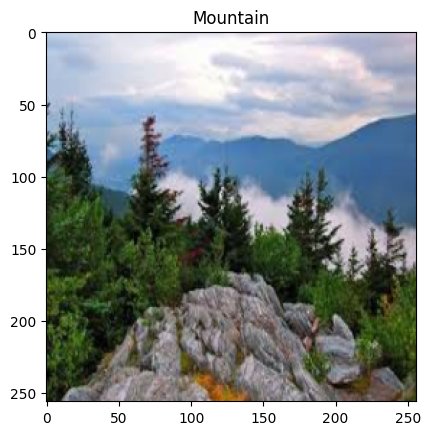

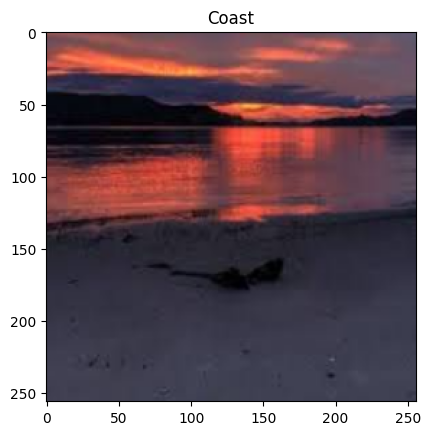

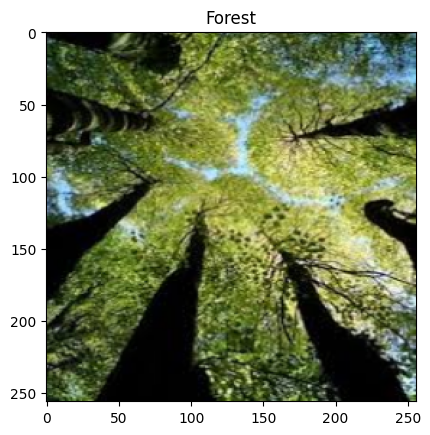

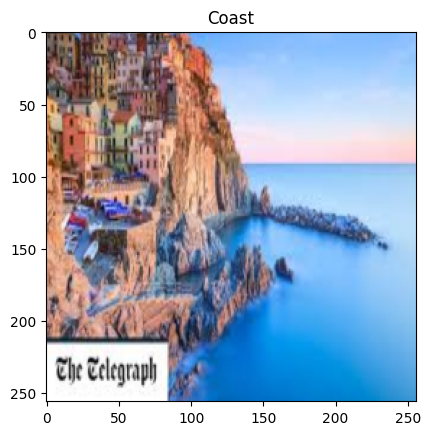

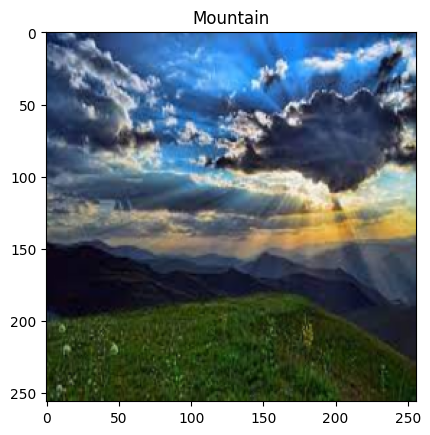

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import datasets, transforms

path = 'data/Training Data' #load data, transform so all are the same size
transform = transforms.Compose([transforms.Resize((256,256)),transforms.ToTensor()])
images = datasets.ImageFolder(path, transform)
dataloader = torch.utils.data.DataLoader(images, batch_size=5, shuffle=True)

image,label = next(iter(dataloader))
classes = ['Coast','Desert','Forest','Glacier','Mountain']
for i in range(5):
    image2 = np.transpose(np.array(image[i]), (1,2,0)) #convert into valid shape for imshow 
    plt.imshow(image2)
    plt.title(classes[label[i]])
    plt.show()

## 4c. Small dataset

*Describe the small dataset you constructed as requested in the project proposal. How many examples did you use? How large was the dataset in total?*

> Our current (large) dataset has 12,000 images (2400 of each class) and is around 430MB. 

> Previously, in order to create a smaller dataset, we planned to use only 250 total images (50 images from each class). This smaller dataset was around 9MB. However, given how slow the training was going, we reduced the dataset size even further to 10 images from the coast class. This is around 76 KB. 

(Smaller dataset is subset of images from https://www.kaggle.com/datasets/utkarshsaxenadn/landscape-recognition-image-dataset-12k-images)

## 5. Updated Methods

*This should be an updated version of your methods section from your proposal. Write this section as if the reader hasn't read your original proposal. For example:*

>We will use train a diffusion model to generate landscape pictures, both unconditionally and conditionally. The conditional model will be conditioned on the following classes: coast, desert, glacier, forest, mountain .We will specifically use a U-Net architecture.

>Diffusion models train by slowly adding noise to the training image until it is completely destroyed. A new image is generated by the reverse process of “denoising”, and the loss function for the model is based on the difference in distributions of the input and the denoised variant. Since these loss functions are specific to diffusion models, we will refer to the mathematical methods used in the project we are using as a reference- https://github.com/tcapelle/Diffusion-Models-pytorch. The project is based on paper [3, Ho] on Denoising Diffusion Probabilistic Methods, which we will use as a conceptual guide. Research has shown the strength of diffusion models in image generation from text. The Google text-to-image diffusion model, Imagen, reached an FID score of 7.27 on a dataset it hadn’t trained on [4, Saharia]. This paper will serve as an additional reference. 

>We will evaluate the performance of the model on the basis of FID scores. We will also gauge the performance of the class-conditioned model with the predicted class results from an image classifier trained to identify the class of real landscape photos.


## 6. Proposed Deliverables

*Copy the deliverables from your proposal and write a sentence saying whether you completed this goal, made progress on this goal, or abandoned this goal. Unless you completed the goal, give an explanation of how it went.*

### 6.1 Previous Essential Goals
> - We want to train a diffusion model unconditionally (without information about image classes) with the images from the Kaggle Landscape Recognition dataset without their labels. (https://www.kaggle.com/datasets/utkarshsaxenadn/landscape-recognition-image-dataset-12k-images)

We have completed this goal, as we successfully ran our model. To preserve our free credits, we used a small training subset. For satisfactory results, we will next have to train on more data.

> - We will use an existing library for computing FID scores to assess the performance of our model.

We have not started on this goal but expect the process to go well. 


### 6.2 Previous Desired Goals
- We will try to find the optimal values for the following hyperparameters:
   > 1) noise schedule hyperparameters (for example: max noise, linear v. more complex function, number of time steps in noise schedule)
   > 2) activation functions used (eg. Gelu v. Relu)
   
We have shifted this goal to the Stretch goals section. Our reason for doing is as follows:
We have found that it is very computationally expensive to train our model. Running the model the first time exhausted a team member's free trial for the GPU on Colab. We fear that we won't be able to adequately experiment with different values for the hyperparameters before our credits get exhausted. 

> - We will train a GAN-style discriminator to distinguish between real and model-generated images. Instead of using 1s or 0s to classify our images as “real” or “fake”, we would like to use probabilities to better gauge the discriminator’s confidence in its classification. Generated images with higher probability scores would indicate good performance from our diffusion model. We will also use this to observe changes in performance produced by modifying our hyperparameters.

We have modified this goal. We feel that this metric would be more a reflection of the performance of the discriminator rather than our diffusion model. As such, we changed it to focus more on how the conditional diffusion model is doing.

### 6.3 Previous Stretch Goals
> - We would next train our diffusion model conditionally on a dataset of images labeled with landscape classes (specifically, coast, desert, glacier, forest, mountain)

We have shifted this goal to our desired goals and would like to complete it. It is important to us to observe how class conditioning changes the results. 

> - We will compare the conditional vs. unconditional model’s performance. We will compare these models with the same metrics as mentioned above (GAN discriminator, FID).

We have modified this goal. Our stretch goals now focus on changing hyperparameters. For desired goals, we want to focus on the conditional diffusion model.


## 7. Results So Far

*Show the results of your methods trained on your data. You should at least have empirical results for the small dataset described in 4c. Unless you are doing generation or another task where simple models (e.g., linear regression or logistic regression) aren't applicable, we strongly encourage you to compare your initial results against a simple baseline. If you have additional results, you're welcome to include those as well.*

> We trained our diffusion model on a smaller dataset. As we were trying to be cautious our credits, we used a small dataset and lower epochs, resulting in undeveloped results. Training on more data for longer should produce better results that we can use the FID metric on. 

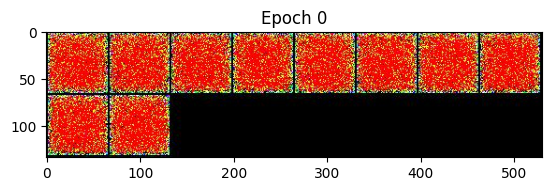

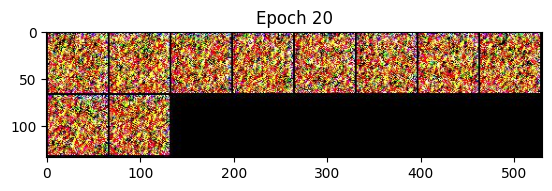

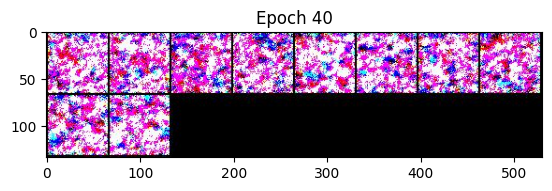

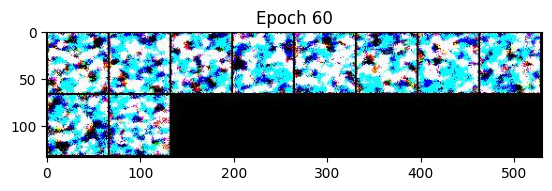

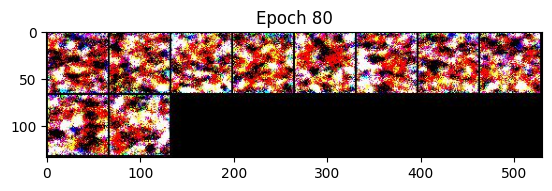

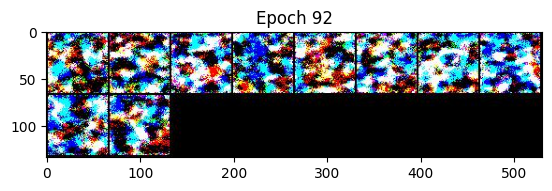

In [1]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
 
plt.title("Epoch 0")
image = mpimg.imread("UpdateResults/0.jpg")
plt.imshow(image)
plt.show()

plt.title("Epoch 20")
image = mpimg.imread("UpdateResults/20.jpg")
plt.imshow(image)
plt.show()

plt.title("Epoch 40")
image = mpimg.imread("UpdateResults/40.jpg")
plt.imshow(image)
plt.show()

plt.title("Epoch 60")
image = mpimg.imread("UpdateResults/60.jpg")
plt.imshow(image)
plt.show()

plt.title("Epoch 80")
image = mpimg.imread("UpdateResults/80.jpg")
plt.imshow(image)
plt.show()

plt.title("Epoch 92")
image = mpimg.imread("UpdateResults/92.jpg")
plt.imshow(image)
plt.show()

## 8. New Deliverables

*For any proposed deliverables that you did NOT complete or abandon, copy them into these lists below. Then, if you have abandoned or completed your Desired or Stretch goals, add new goals until you have at least two goals per category.*

8.1 New Essential Goals
> - Completed essential goal:
We want to train a diffusion model unconditionally (without information about image classes) with the images from the Kaggle Landscape Recognition dataset without their labels. (https://www.kaggle.com/datasets/utkarshsaxenadn/landscape-recognition-image-dataset-12k-images) 
> - Remaining essential goal:
We will use an existing library for computing FID scores to assess the performance of our model.

8.2 New Desired Goals

> - We will next train our diffusion model conditionally on a dataset of images labeled with landscape classes (specifically, coast, desert, glacier, forest, mountain).
> - We will train a conditional GAN-style discriminator to distinguish the different classes of landscape images in our training data with (real pictures). We will then produce images using our conditional diffusion model and use our trained discriminator to identify the class of the generated pictures. We can then use this as a metric to gauge performance- the more of our images classified as the class they were supposed to belong to, the better.

8.3 New Stretch Goals

> - We will try to find the optimal values for the following hyperparameters:
   > 1) noise schedule hyperparameters (for example: max noise, linear v. more complex function, number of time steps in noise schedule)
   > 2) activation functions used (eg. Gelu v. Relu)
> - We will assess the change in performance with our new hyperparameters using the FID and discriminator results mentioned above.

## 9. Hopes and Concerns

*What's gone well so far? What's been the hardest thing?*

> We have found that it is very computationally expensive to train our model. Running the model the first time exhausted a team member's free trial for the GPU on Colab. We need to find a tradeoff between preserving credits and giving the model enough time and training data.
> Training the model takes time, so we need to figure out how to keep it running for long stretches (10 hours for our standard number of epochs). We haven't yet figured out how to run the model such that it isn't affected by our computers going to sleep.


## 10. References

*Cite the papers or sources that you used to discover your datasets and/or models, if you didn't include the citation above. For example:*

[1]https://github.com/dome272/Diffusion-Models-pytorch
[2]https://github.com/tcapelle/Diffusion-Models-pytorch
[3]* Jonathan Ho, Ajay Jain, Pieter Abbeel: “Denoising Diffusion Probabilistic Models”, 2020; [http://arxiv.org/abs/2006.11239 arXiv:2006.11239].
[4] Saharia, Chitwan, et al. “Photorealistic Text-to-Image Diffusion Models with Deep Language Understanding.” arXiv:2110.02037 (2022).
